# Income Predictor
### Description

In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt

## Load data for training / testing

In [2]:
def load_data(path):
    return pd.read_csv(path)

In [3]:
df_train = load_data('../data/au_train.csv')
df_test = load_data('../data/au_test.csv')

## Exploratory Data Analysis
While some information was provided on the set of instructions for this project, there have been countless times I've found discrepencies between the documentation for the dataset and the dataset itself. Even if all looks good, it is always helpful to visualize the distribution of each column to make sure there is not any incorrect data or outliers.

In [4]:
print("Number of columns in the dataset: {}".format(len(df_train.columns)))
print("Columns names:", list(df_train.columns))

Number of columns in the dataset: 15
Columns names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'class']


In [5]:
# print out general statistics for the numerical predictors
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


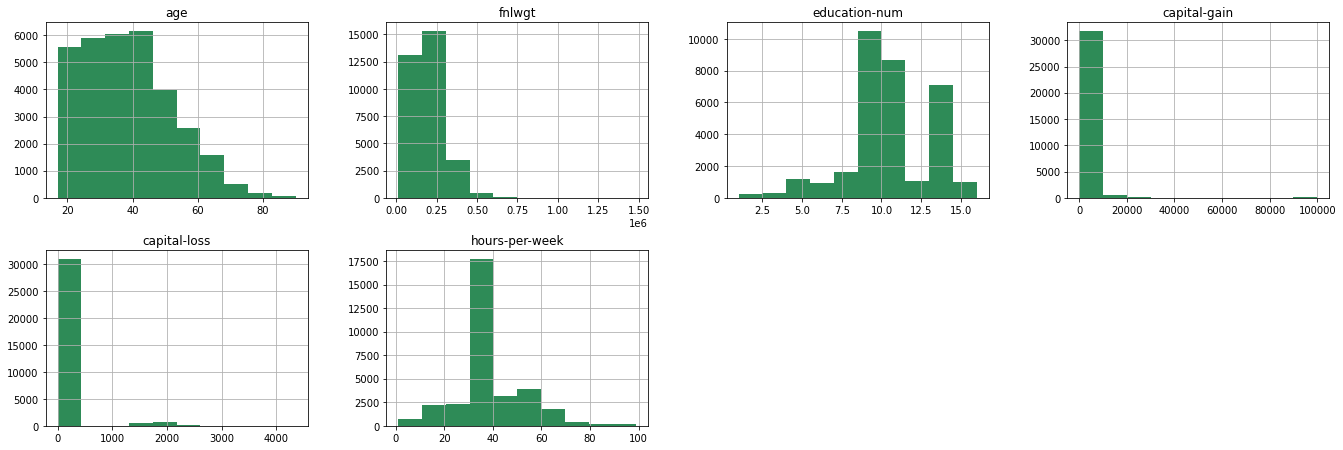

In [6]:
# plotting numerical predictors
subplot = df_train.hist(layout=(5,4), figsize=(23,20), color='seagreen')

In [7]:
def plot_distribution(df, preds):
    '''
    Plots distribution of categorical variables
    '''
    fig, axes = plt.subplots(1, len(preds), figsize=(20, len(preds)))
    for i, pred in enumerate(preds):
        df[pred].value_counts().plot(ax=axes[i], kind='bar', grid=True, title=pred, rot=75, color='seagreen')

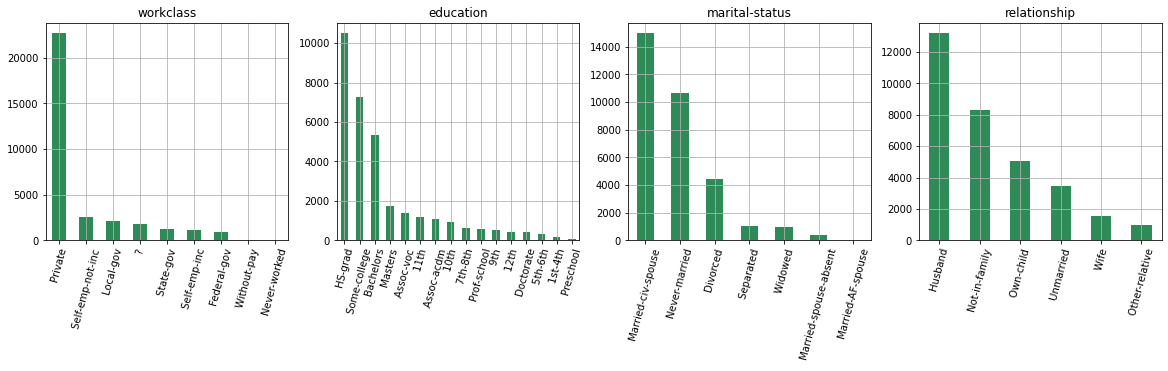

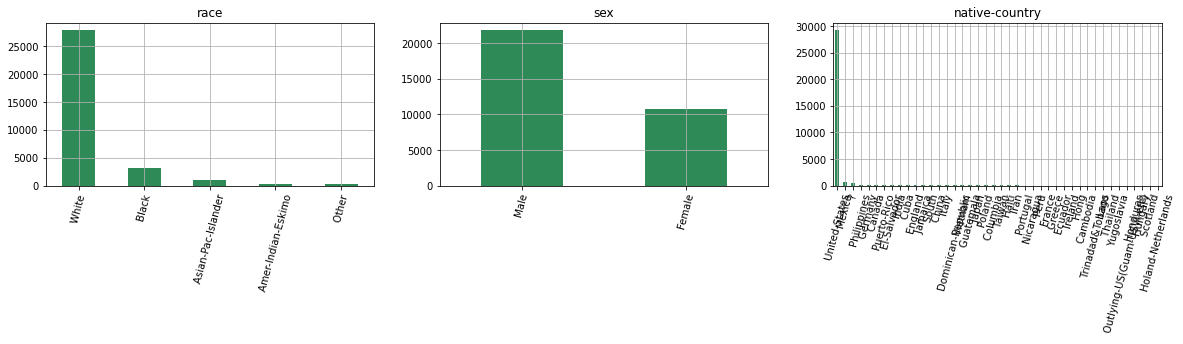

In [8]:
# plotting categorical predictors
plot_distribution(df_train, ['workclass', 'education', 'marital-status', 'relationship'])
plot_distribution(df_train, ['race', 'sex', 'native-country'])

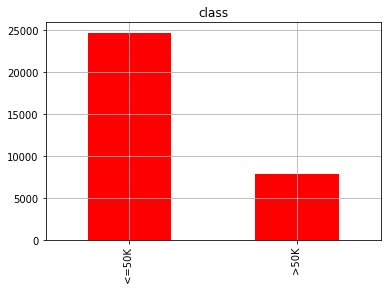

In [9]:
# plotting target variable distribution
plt = df_train['class'].value_counts().plot(kind='bar', grid=True, title="class", color="red")

In [10]:
# check for null values
print(df_train.isnull().any())

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
class             False
dtype: bool


## Feature Engineering

In [11]:
# might want to scale the numerical data
from sklearn import preprocessing
df_scaled = preprocessing.scale(df_train)
df_train_scaled = pd.DataFrame(df_scaled, columns=df_train.columns)

ValueError: could not convert string to float: ' State-gov'

In [17]:
def one_hot_encode(df):
    '''
    Handles categorical inputs by creating a binary feature for each possible category,
    assigning a value of 1 for the feature that corresponds to the original category and 0
    for the remaining
    '''
    one_hot_encoder = OneHotEncoder(sparse=False)
    one_hot_encoder.fit(df)
    encoded = one_hot_encoder.transform(df)
    print(one_hot_encoder.categories_)
    return pd.DataFrame(data=encoded, columns=one_hot_encoder.categories_)

In [34]:
# converting categorical values to numerical values
#categorical_columns = ['workclass', 'education', 'marital-status', 'relationship', 'race', 'sex', 'native-country']
categorical_columns = ['race', 'sex']
from sklearn.preprocessing import OneHotEncoder
#for col in df_train.columns:
df_train_encoded = one_hot_encode(df_train["race"])

ValueError: Expected 2D array, got 1D array instead:
array=[4 4 4 ... 4 4 4].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

## Building model

In [14]:
import keras

In [ ]:
def model():